<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-01-19 16:47:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.28.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-01-19 16:47:45 (110 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



## Load data
데이터 구조를 살펴보면 알겠지만 문장과 문장 사이는 엔터로 구분되어 있음.

In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read() # 이제 데이터를 하드코딩하는게 아니라 읽어올거임

corpus = data.lower().split("\n") # 엔터를 기준으로 나눠서 corpus 생성

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index) # Total number of unique word in this corpus
print(total_words)


## Corpus를 training data로 만들기

In [5]:
input_sequences = []
for line in corpus:
  # Then for each line in the corpus, we'll generate a token list using the tokenizers, texts to sequences method.
  # 이렇게 하면 line of text가 그 줄의 각 단어를 나타내는 token list로 반환됨.
	token_list = tokenizer.texts_to_sequences([line])[0] 
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence) # 어떤 문장(line)에 대한 input sequence는 line의 token list를 지나오면서 하나씩 추가된다.

# 따라서 어떤 문장(line)의 모든 단어의 token을 갖고 있는 입력 sequence는 맨 마지막 sequence인, input sequences 중 가장 긴 길이를 갖고 있는 sequence일 것이다.
max_sequence_len = max([len(x) for x in input_sequences])

# pad sequences : 가장 길이가 긴 sequence를 찾았으면 패딩하여 모든 sequence의 길이를 맞춘다. 이 때, 라벨을 쉽게 추출할 수 있도록 *PRE* 패딩한다.
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# 한 문장이 토큰이 하나씩 추가되며 표현되었으므로, 마지막 문자(token)를 제외한 모든 문자를 Input X로 가져가고, 마지막 문자를 Label Y로 가져가게 한다.
 # 슬라이싱 범위 주의
xs = input_sequences[:,:-1] # [전체, 마지막 하나 빼고 전체]
labels = input_sequences[:,-1] # [전체, 마지막 하나]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [7]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [8]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [9]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 [==============================] - 13s 10ms/step - loss: 6.8250 - accuracy: 0.0635
Epoch 2/100
377/377 [==============================] - 4s 9ms/step - loss: 5.7158 - accuracy: 0.1111
Epoch 3/100
377/377 [==============================] - 4s 10ms/step - loss: 4.7627 - accuracy: 0.1745
Epoch 4/100
377/377 [==============================] - 4s 9ms/step - loss: 3.7858 - accuracy: 0.2534
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 2.8675 - accuracy: 0.3818
Epoch 6/100
377/377 [==============================] - 4s 10ms/step - loss: 2.2695 - accuracy: 0.4863
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 1.7781 - accuracy: 0.5819
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 1.4477 - accuracy: 0.6602
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 1.2478 - accuracy: 0.7055
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 1.0951 - a

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

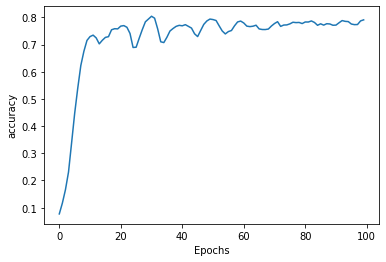

In [13]:
plot_graphs(history, 'accuracy')


## Predicting a word
Let's take a look at how to get a prediction for a word and how to **generate new text** based on those predictions.

In [14]:
seed_text = "I've got a bad feeling about this"
next_words = 100 # next 100 words를 예측하고 싶다.
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0] # 토크나이저를 이용하여 시퀀스 만들기 this code will tokenizer that for me using the text to sequences method on the tokenizer.
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0) # 모델에 전달하여 다음에 올 확률이 가장 높은 단어의 토큰을 얻을 수 있다. This is will give us the token of the word most likely to be the next one in the sequence
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted: # 토큰을 다시 단어로 바꾼다.
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this that we have taken go to the salley gardens with little snow eyes with lanigans ball or all over each one gone and wines of the day the pipes are calling white friendly rising water of erin across youll see dublin gone and well he had cold love seen a thing the old woman and times more gone by gone by as snow and snow eyes loud and clear as the rose that art sinking funds was night come to find me gone and gone and for me as one dear kissed me darling mother dear dear ye look so


참고로 문장이 길어질수록 예측 문장은 횡설수설해진다!

이거를 방지(?)하기 위해서는 아주아주 큰 데이터를 넣으면 좀 나아진다.

I've got a bad feeling about this that we have taken go to the salley gardens with little snow eyes with lanigans ball or all over each one gone and wines of the day the pipes are calling white friendly rising water of erin across youll see dublin gone and well he had cold love seen a thing the old woman and times more gone by gone by as snow and snow eyes loud and clear as the rose that art sinking funds was night come to find me gone and gone and for me as one dear kissed me darling mother dear dear ye look so

오 좀 나아졌나?